QUESTION NO 1

In [ ]:
import pandas as pd

file_path = "bank.csv"
df = pd.read_csv("/content/drive/MyDrive/AI WEEK TWO/bank .csv")

print("DataFrame Information:")
print(df.info())

object_columns = df.select_dtypes(include='object').columns
print("\nColumns with dtypes=object:")
print(object_columns)

print("\nUnique values of columns with dtypes=object:")
for col in object_columns:
    print(f"{col}: {df[col].unique()}")

print("\nTotal number of null values in each column:")
print(df.isnull().sum())

numeric_df = df.drop(columns=object_columns)
numeric_file_path = "banknumericdata.csv"
numeric_df.to_csv(numeric_file_path, index=False)
print(f"\nNumeric DataFrame saved to '{numeric_file_path}'.")

numeric_df_read = pd.read_csv(numeric_file_path)
print("\nSummary Statistics of the Numeric DataFrame:")
print(numeric_df_read.describe())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Columns with dtypes=object:
Index(['job', 'marital', 'education', 'def

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

QUESTION NO 2

In [ ]:

import pandas as pd
medical_students = pd.read_csv("/content/drive/MyDrive/AI WEEK TWO/medical_students_dataset.csv")

print(medical_students.info())

print("Missing values:\n", medical_students.isnull().sum())

if 'Age' in medical_students.columns:
    medical_students['Age'].fillna(medical_students['Age'].mean(), inplace=True)

if 'Gender' in medical_students.columns:
    medical_students['Gender'].fillna('Unknown', inplace=True)

print("Number of duplicate rows:", medical_students.duplicated().sum())

medical_students.drop_duplicates(inplace=True)

medical_students.to_csv("medical_student_cleaned.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Bloo

<ipython-input-3-f25d7eb34e48>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_students['Age'].fillna(medical_students['Age'].mean(), inplace=True)
<ipython-input-3-f25d7eb34e48>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Number of duplicate rows: 7644


QUESTION NO 3

In [ ]:
import pandas as pd

titanic = pd.read_csv("/content/drive/MyDrive/AI WEEK TWO/Copy of Titanic-Dataset.csv")

subset_df = titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print("Fare Analysis for First-Class Passengers:")
print(f"Mean: {fare_mean}, Median: {fare_median}, Max: {fare_max}, Min: {fare_min}")



null_ages = first_class_df['Age'].isnull().sum()
print(f"Number of missing values in 'Age': {null_ages}")

first_class_df = first_class_df.dropna(subset=['Age'])

print(f"Remaining rows after dropping null 'Age' values: {len(first_class_df)}")


embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

titanic = pd.concat([titanic, embarked_dummies], axis=1)

titanic.drop(columns=['Embarked'], inplace=True)

print(titanic.head())



Fare Analysis for First-Class Passengers:
Mean: 84.1546875, Median: 60.287499999999994, Max: 512.3292, Min: 0.0
Number of missing values in 'Age': 30
Remaining rows after dropping null 'Age' values: 186
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500  

QUESTION NO 5

Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-7-6e17d16e3695>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic, ci=None, palette='pastel')
<ipython-input-7-6e17d16e3695>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic, ci=None, palette='pastel')


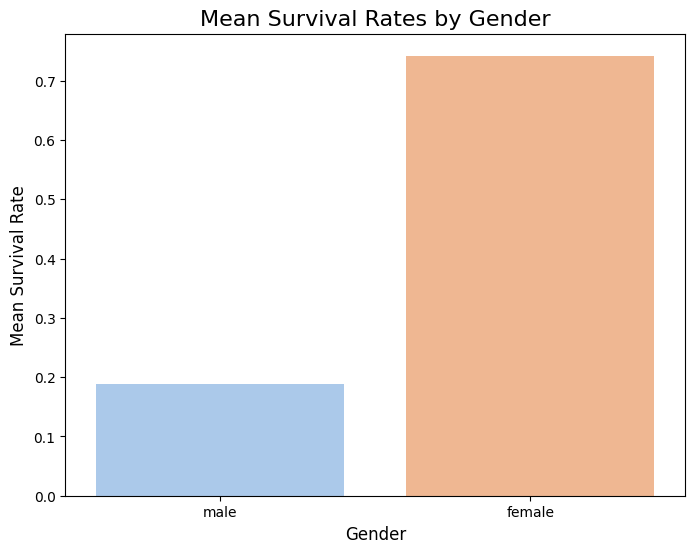

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv("/content/drive/MyDrive/AI WEEK TWO/Copy of Titanic-Dataset.csv")

mean_survival_by_gender = titanic.groupby('Sex')['Survived'].mean()
print("Mean survival rates by gender:")
print(mean_survival_by_gender)

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic, ci=None, palette='pastel')

plt.title("Mean Survival Rates by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mean Survival Rate", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


QUESTION NO 6

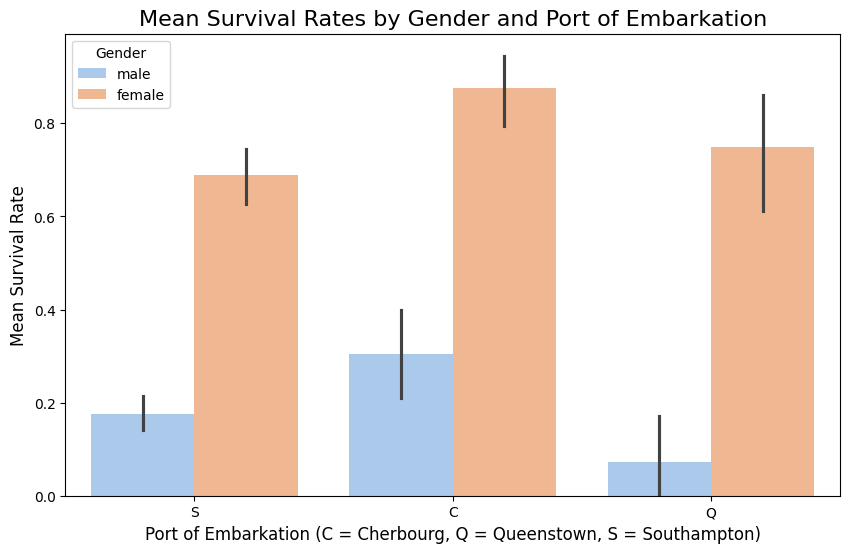

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv("/content/drive/MyDrive/AI WEEK TWO/Copy of Titanic-Dataset.csv")

titanic_filtered = titanic.dropna(subset=['Embarked', 'Sex'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=titanic_filtered, palette='pastel')

plt.title("Mean Survival Rates by Gender and Port of Embarkation", fontsize=16)
plt.xlabel("Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)", fontsize=12)
plt.ylabel("Mean Survival Rate", fontsize=12)
plt.legend(title="Gender", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


QUESTION NO 7

<ipython-input-9-dd6004532a22>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_filtered['AgeGroup'] = pd.qcut(titanic_filtered['Age'], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])
<ipython-input-9-dd6004532a22>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic_filtered.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()


Survival Rates by Pclass and AgeGroup:
AgeGroup        Q1        Q2        Q3        Q4        Q5
Pclass                                                    
1         0.809524  0.761905  0.666667  0.777778  0.506667
2         0.742857  0.400000  0.416667  0.461538  0.363636
3         0.333333  0.197674  0.283582  0.166667  0.088235


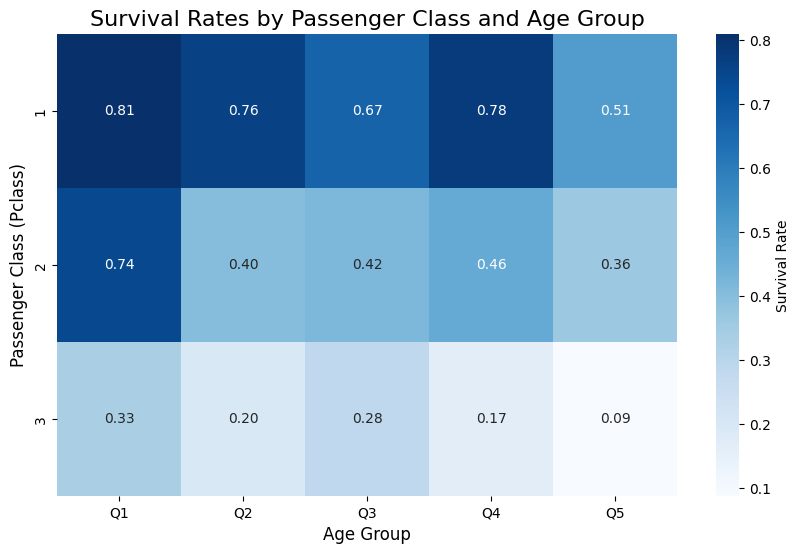

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv("/content/drive/MyDrive/AI WEEK TWO/Copy of Titanic-Dataset.csv")

titanic_filtered = titanic.dropna(subset=['Age', 'Pclass', 'Survived'])

titanic_filtered['AgeGroup'] = pd.qcut(titanic_filtered['Age'], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

survival_rates = titanic_filtered.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack()
print("Survival Rates by Pclass and AgeGroup:")
print(survival_rates)

plt.figure(figsize=(10, 6))
sns.heatmap(survival_rates, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Survival Rate'})

plt.title("Survival Rates by Passenger Class and Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Passenger Class (Pclass)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()
